In [1]:
%matplotlib inline
import numpy as np
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt
import os
import pickle
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import pandas as pd
from IPython.display import display, HTML

### Point to current results path for previously trained model:

In [3]:
resultPath = '/Users/ashley1/repos/clinicalNoteTagger/results/az_csu'

In [7]:
#load original test set of records:
input_file = pd.read_csv('/Users/ashley1/repos/csu_snomed_test', sep='\t')

input_file.shape

(33741, 6)

In [8]:
input_file[:5]

,id,case_number,invoice_number,combined,all_groups,top_levels
0,909695,296423,3393678,"Gracie, a 2 year old female spayed Bernese Mou...",232234000|3135009|246075003|18097004|275441009...,3-7-17-13-7-17-13-17-1-13-11-17-13
1,909696,296422,3393679,Truman was presented to the CSU Orthopedic Sur...,450876003|272741003|7771000,NaN
2,909698,291144,3393683,"Twila is an 11 month old, female spayed, DSH f...",102499006,17
3,909699,295061,3393684,Rufus is a 9 month old male intact Newfoundlan...,183644000|R44462005|363698007|R23416004|272741...,17-14-17-14
4,909706,296425,3393700,This patient was a stray geriatric female cat ...,88610006|S42399005|371597004,17-11-17-17


In [4]:
epochAvgLoss = np.loadtxt(os.path.join(resultPath, 'epochAvgLoss.gz'))
epochAvgLossValid = np.loadtxt(os.path.join(resultPath, 'epochAvgLossValid.gz'))

#true values for test set (numpy array)
yDev = np.loadtxt(os.path.join(resultPath, 'yDev.gz'))

#true values for train set (numpy array)
yTrain = np.loadtxt(os.path.join(resultPath, 'yTrain.gz'))

#predictions for data - test
epochPredictions = np.loadtxt(os.path.join(resultPath, 'epochPreds.gz'))
predsRealShape = np.loadtxt(os.path.join(resultPath, 'epochPredsShape.gz')).astype(int)
epochPredictions = epochPredictions.reshape(predsRealShape)


In [5]:
np.loadtxt(os.path.join(resultPath, 'epochPredsShape.gz')).astype(int)

array([   10, 33741,    19])

In [6]:
print(epochPredictions.shape)
print(epochAvgLoss.shape)
print(yDev.shape)

(10, 33741, 19)
(10,)
(33741, 19)


In [71]:
epochPredictions

array([[[ -7.04530191,  -2.12212586,   1.37556517, ...,  -2.62354565,
          -2.51168776,  -2.61330462],
        [-13.64217377,  -2.39717865,  -3.04373717, ...,  -5.09617853,
          -5.53177977,  -5.89677811],
        [-12.75076771,  -2.14973402,  -2.64090681, ...,  -4.64122915,
          -4.720016  ,  -5.25743103],
        ..., 
        [ -7.3688798 ,  -0.58639139,  -1.59549928, ...,  -1.8237828 ,
          -1.48324513,  -1.93354869],
        [ -6.40805578,  -0.51285201,  -1.42532885, ...,  -1.46517253,
          -0.98000902,  -1.35049808],
        [ -4.51256514,  -0.33509949,  -0.90993005, ...,  -0.9419589 ,
          -0.5678944 ,  -0.70134616]],

       [[ -8.58747387,  -2.40809941,   3.76138234, ...,  -3.5117445 ,
          -4.40421772,  -2.82605505],
        [-16.22289276,  -3.88786674,  -4.48259592, ...,  -5.40298557,
          -7.40566587,  -6.90449381],
        [-14.07459736,  -3.53257608,  -2.29756832, ...,  -6.06175518,
          -7.40848541,  -6.3185544 ],
        ...,

In [9]:
with open(os.path.join(resultPath, 'hyperParamDict.pickle'), 'rb') as handle:
    hyperParamDict = pickle.load(handle)
pp.pprint(hyperParamDict)

{   'EMBED_SIZE': 300,
    'batchSize': 256,
    'inputKeepProb': 1,
    'learningRate': 0.001,
    'maxGradNorm': 5,
    'maxNoteLength': 1000,
    'n_hidden': 200,
    'numLayers': 1,
    'outputKeepProb': 0.5,
    'sizeList': [200, 150, 75, 19],
    'trainingEpochsMax': 100}


In [76]:
predsRaw = scipy.special.expit(epochPredictions)# this is sigmoid function applied element wise
preds = predsRaw
preds[preds >= 0.5] = 1
preds[preds < 0.5] = 0
bestEpoch = np.argmin(epochAvgLossValid)
nEpochs = epochPredictions.shape[0]

In [77]:
predsRaw = scipy.special.expit(epochPredictions)# this is sigmoid function applied element wise
predsRaw[:1]

array([[[  8.70734867e-04,   1.06964831e-01,   7.98277803e-01, ...,
           6.76383500e-02,   7.50428759e-02,   6.82870509e-02],
        [  1.18926516e-06,   8.33880917e-02,   4.54886290e-02, ...,
           6.08286200e-03,   3.94332546e-03,   2.74075288e-03],
        [  2.90008472e-06,   1.04356081e-01,   6.65516800e-02, ...,
           9.55368091e-03,   8.83626031e-03,   5.18167881e-03],
        ..., 
        [  6.30176783e-04,   3.57463265e-01,   1.68611593e-01, ...,
           1.38980586e-01,   1.84937761e-01,   1.26358314e-01],
        [  1.64551372e-03,   3.74525185e-01,   1.93827547e-01, ...,
           1.87677475e-01,   2.72889994e-01,   2.05788954e-01],
        [  1.08512426e-02,   4.17000359e-01,   2.87014151e-01, ...,
           2.80504823e-01,   3.61722823e-01,   3.31513835e-01]]])

In [11]:
preds.shape

(10, 33741, 19)

In [79]:
predsRaw[:5]

array([[[  8.70734867e-04,   1.06964831e-01,   7.98277803e-01, ...,
           6.76383500e-02,   7.50428759e-02,   6.82870509e-02],
        [  1.18926516e-06,   8.33880917e-02,   4.54886290e-02, ...,
           6.08286200e-03,   3.94332546e-03,   2.74075288e-03],
        [  2.90008472e-06,   1.04356081e-01,   6.65516800e-02, ...,
           9.55368091e-03,   8.83626031e-03,   5.18167881e-03],
        ..., 
        [  6.30176783e-04,   3.57463265e-01,   1.68611593e-01, ...,
           1.38980586e-01,   1.84937761e-01,   1.26358314e-01],
        [  1.64551372e-03,   3.74525185e-01,   1.93827547e-01, ...,
           1.87677475e-01,   2.72889994e-01,   2.05788954e-01],
        [  1.08512426e-02,   4.17000359e-01,   2.87014151e-01, ...,
           2.80504823e-01,   3.61722823e-01,   3.31513835e-01]],

       [[  1.86391683e-04,   8.25571572e-02,   9.77276774e-01, ...,
           2.89799051e-02,   1.20780049e-02,   5.59323422e-02],
        [  9.00507127e-08,   2.00776371e-02,   1.11776779e-0

In [12]:
epochAvgLossValid

array([ 0.22721621,  0.17077647,  0.13366617,  0.11322781,  0.10344457,
        0.09722157,  0.09686789,  0.09702023,  0.09755787,  0.10135662])

In [13]:
bestEpoch = np.argmin(epochAvgLossValid)
print('best model at epoch %d with a validation loss of %.5f'%(bestEpoch, epochAvgLossValid[bestEpoch]))

best model at epoch 6 with a validation loss of 0.09687


In [72]:
precOverEpoch = np.zeros(preds.shape[0])
recOverEpoch = np.zeros(preds.shape[0])
f1OverEpoch = np.zeros(preds.shape[0])
coverErrOverEpoch = np.zeros(preds.shape[0])
rankLossOverEpoch = np.zeros(preds.shape[0])
lrapOverEpoch = np.zeros(preds.shape[0])
for epoch in range(preds.shape[0]):
    prec = metrics.precision_score(y_pred = preds[epoch,:,:], y_true= yDev, average = 'samples')
    rec = metrics.recall_score(y_pred = preds[epoch,:,:], y_true= yDev, average = 'samples')
    f1 = metrics.f1_score(y_pred = preds[epoch,:,:], y_true= yDev, average = 'samples')
    coverErr = metrics.coverage_error(yDev, predsRaw[epoch, :,:])
    rankLoss = metrics.label_ranking_loss(yDev, predsRaw[epoch,:,:])
    lrap = metrics.label_ranking_average_precision_score(yDev, predsRaw[epoch,:,:])
    coverErrOverEpoch[epoch] = coverErr
    rankLossOverEpoch[epoch] = rankLoss
    lrapOverEpoch[epoch] = lrap
    precOverEpoch[epoch] = prec
    recOverEpoch[epoch] = rec
    f1OverEpoch[epoch] = f1

prec = metrics.precision_score(y_pred = preds[bestEpoch,:,:], y_true= yDev, average = 'samples')
preds[bestEpoch,:,:]
gives you zeros and ones
predsRaw[bestEpoch,:,:]
gives you probabilities

In [15]:
#create a 2D numpy array with predictions from the bestEpoch:
bestpreds = preds[bestEpoch,:,:]
bestpreds.shape

(33741, 19)

In [80]:
bestpredsraw = predsRaw[bestEpoch,:,:]
bestpredsraw.shape

(33741, 19)

In [81]:
bestpredsraw

array([[  1.14888646e-09,   3.47420840e-03,   9.99338376e-01, ...,
          7.28859110e-03,   2.20601860e-03,   2.65197340e-03],
       [  2.31423372e-08,   7.61057090e-04,   2.96991544e-03, ...,
          7.26209950e-04,   3.46244525e-04,   6.33081068e-04],
       [  6.63561816e-07,   9.78214841e-03,   7.77877675e-02, ...,
          7.64351017e-04,   1.07323525e-03,   2.87397745e-03],
       ..., 
       [  7.77677249e-08,   9.90097608e-01,   4.02191820e-02, ...,
          2.21222408e-03,   1.97434449e-03,   8.87055863e-03],
       [  5.53403189e-11,   9.11926699e-01,   6.52291654e-03, ...,
          5.87692177e-03,   3.84333486e-02,   1.07612633e-02],
       [  1.20270237e-05,   1.11761172e-01,   4.15529343e-02, ...,
          9.69545220e-01,   3.35041679e-02,   6.98109490e-02]])

In [82]:
df3 = pd.DataFrame(bestpredsraw, columns=list('ABCDEFGHIJKLMNOPQRS'))
df3.shape

(33741, 19)

In [83]:
df3[:2]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
0,1.148886e-09,0.003474,0.999338,8.982684e-12,0.015190,0.004459,0.999998,2.531937e-07,0.002604,0.019214,0.990903,0.999354,0.036144,0.000704,0.000878,0.999026,0.007289,0.002206,0.002652
1,2.314234e-08,0.000761,0.002970,1.920216e-03,0.000494,0.050393,0.978760,7.060580e-05,0.000392,0.003304,0.003383,0.001836,0.002543,0.000130,0.000174,0.000101,0.000726,0.000346,0.000633


In [84]:
frames = [input_file, df3]

result_raw = pd.concat(frames, axis=1)

In [85]:
result_raw.shape


(33741, 25)

In [91]:
result_raw[:2]

,id,case_number,invoice_number,combined,all_groups,top_levels,_,dig,skin_sc,preg,...,injury_poison,infect,Endo_Nut_Met_Immune,neoplasia,mental,Hematopoietic,Sense_organs,Nervous,Respiratory,ICD_EV
0,909695,296423,3393678,"Gracie, a 2 year old female spayed Bernese Mou...",232234000|3135009|246075003|18097004|275441009...,3-7-17-13-7-17-13-17-1-13-11-17-13,1.148886e-09,0.003474,0.999338,8.982684e-12,...,0.019214,0.990903,0.999354,0.036144,0.000704,0.000878,0.999026,0.007289,0.002206,0.002652
1,909696,296422,3393679,Truman was presented to the CSU Orthopedic Sur...,450876003|272741003|7771000,NaN,2.314234e-08,0.000761,0.002970,1.920216e-03,...,0.003304,0.003383,0.001836,0.002543,0.000130,0.000174,0.000101,0.000726,0.000346,0.000633


In [87]:
result_raw.rename(columns = {'A':'_',
                          'B':'dig',
                          'C':'skin_sc',
                          'D':'preg',
                          'E':'cong',
                          'F':'ms',
                          'G':'clin_signs',
                          'H':'perinatal',
                          'I':'urogen',
                          'J':'injury_poison',
                          'K':'infect',
                          'L':'Endo_Nut_Met_Immune',
                          'M':'neoplasia',
                          'N':'mental',
                          'O':'Hematopoietic',
                          'P':'Sense_organs',
                          'Q':'Nervous',
                          'R':'Respiratory',
                          'S':'ICD_EV'}, inplace = True)



Category maps from below:
': 0,
    '1': 10,
    '10': 1,
    '11': 8,
    '12': 3,
    '13': 2,
    '14': 5,
    '15': 4,
    '16': 7,
    '17': 6,
    '18': 9,
    '2': 12,
    '3': 11,
    '4': 14,
    '5': 13,
    '6': 16,
    '7': 15,
    '8': 18,
    '9': 17}
        
        {1: 'Infectious_parasitic',
                 10: 'Digestive',
                 11: 'Genitourinary',
                 12: 'Pregnancy',
                 13: 'Skin_Subcutaneous',
                 14: 'Musculoskeletal',
                 15: 'Congenital',
                 16: 'Perinatal',
                 17: 'Clinical_signs',
                 18: 'Injury_poisoning',
                 19: 'ICD_EV',
                 2: 'Neoplasia',
                 3: 'Endo_Nut_Met_Immune',
                 4: 'Hematopoietic',
                 5: 'Mental',
                 6: 'Nervous',
                 7: 'Sense_organs',
                 8: 'Circulatory',
                 9: 'Respiratory'}


In [37]:
list(result)

['id',
 'case_number',
 'invoice_number',
 'combined',
 'all_groups',
 'top_levels',
 '_',
 'dig',
 'skin_sc',
 'preg',
 'cong',
 'ms',
 'clin_signs',
 'perinatal',
 'urogen',
 'injury_poison',
 'infect',
 'Endo_Nut_Met_Immune',
 'neoplasia',
 'mental',
 'Hematopoietic',
 'Sense_organs',
 'Nervous',
 'Respiratory',
 'ICD_EV']

In [39]:
 cols = ['_',
 'dig',
 'skin_sc',
 'preg',
 'cong',
 'ms',
 'clin_signs',
 'perinatal',
 'urogen',
 'injury_poison',
 'infect',
 'Endo_Nut_Met_Immune',
 'neoplasia',
 'mental',
 'Hematopoietic',
 'Sense_organs',
 'Nervous',
 'Respiratory',
 'ICD_EV']


In [40]:
result2 = result[cols].astype('int')

In [43]:
result2[:5]
result2.shape

(33741, 19)

In [42]:
#remove categories with all "0" - ie no defined cases:
result3 = result2.loc[:, (result2 != 0).any(axis=0)]
result3[:5]

,dig,skin_sc,cong,ms,clin_signs,urogen,injury_poison,infect,Endo_Nut_Met_Immune,neoplasia,Hematopoietic,Sense_organs,Nervous,Respiratory,ICD_EV
0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [44]:
result3.shape

(33741, 15)

In [45]:
#re concat predictions with input_file
frames = [input_file, result3]

result4 = pd.concat(frames, axis=1)
result4[:5]

,id,case_number,invoice_number,combined,all_groups,top_levels,dig,skin_sc,cong,ms,...,urogen,injury_poison,infect,Endo_Nut_Met_Immune,neoplasia,Hematopoietic,Sense_organs,Nervous,Respiratory,ICD_EV
0,909695,296423,3393678,"Gracie, a 2 year old female spayed Bernese Mou...",232234000|3135009|246075003|18097004|275441009...,3-7-17-13-7-17-13-17-1-13-11-17-13,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
1,909696,296422,3393679,Truman was presented to the CSU Orthopedic Sur...,450876003|272741003|7771000,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,909698,291144,3393683,"Twila is an 11 month old, female spayed, DSH f...",102499006,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,909699,295061,3393684,Rufus is a 9 month old male intact Newfoundlan...,183644000|R44462005|363698007|R23416004|272741...,17-14-17-14,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,909706,296425,3393700,This patient was a stray geriatric female cat ...,88610006|S42399005|371597004,17-11-17-17,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [96]:
#save out merged input file with predictions:
#result4.to_csv('csu_input_with_predictions', sep='\t', index=False)


#save out merged input file with prediction probablilities:
result_raw.to_csv('csu_input_with_probabilities', sep='\t', index=False)

In [25]:
prec = metrics.precision_score(y_pred = preds[bestEpoch,:,:], y_true= yDev, average = 'samples')
rec = metrics.recall_score(y_pred = preds[bestEpoch,:,:], y_true= yDev, average = 'samples')
f1 = metrics.f1_score(y_pred = preds[bestEpoch,:,:], y_true= yDev, average = 'samples')
print('Precision score averaged over samples %3f'%(prec))
print('Recall score averaged over samples %3f'%(rec))
print('F1 score averaged over samples %3f'%(f1))
print('Rank loss %f \n'%rankLossOverEpoch[bestEpoch])
with open(os.path.join(resultPath, 'bestPerformance.txt'), 'w') as performanceFile:
    performanceFile.write('Precsion score averaged over samples %f \n'%(prec))
    performanceFile.write('Recall score averaged over samples %f \n'%(rec))
    performanceFile.write('F1 score averaged over samples %f \n'%(f1))
    performanceFile.write('Rank loss %f \n'%rankLossOverEpoch[bestEpoch])

Precision score averaged over samples 0.914484
Recall score averaged over samples 0.866371
F1 score averaged over samples 0.873689
Rank loss 0.116265 



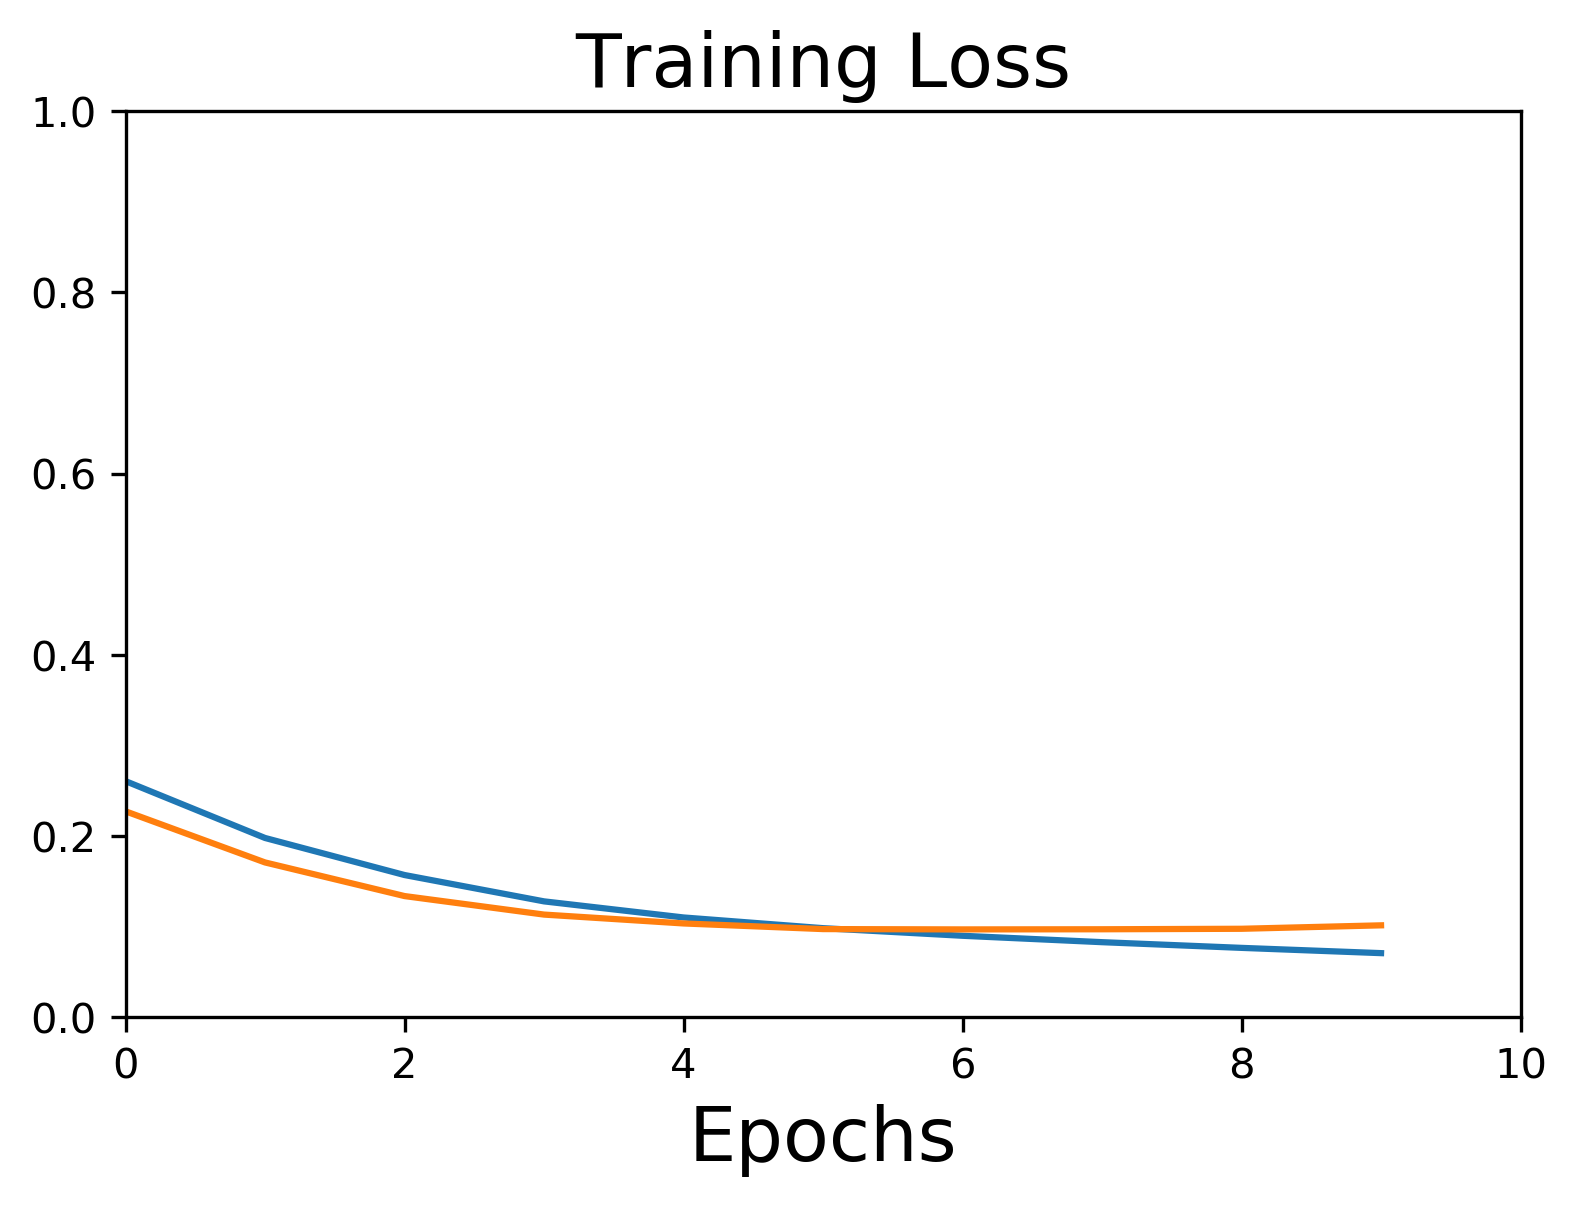

In [26]:
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, epochAvgLoss)
plt.plot(x, epochAvgLossValid)
plt.axis([0, epochPredictions.shape[0], 0, 1.0])
plt.title('Training Loss', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
# plt.show()
fig.savefig(os.path.join(resultPath, 'loss.png'))

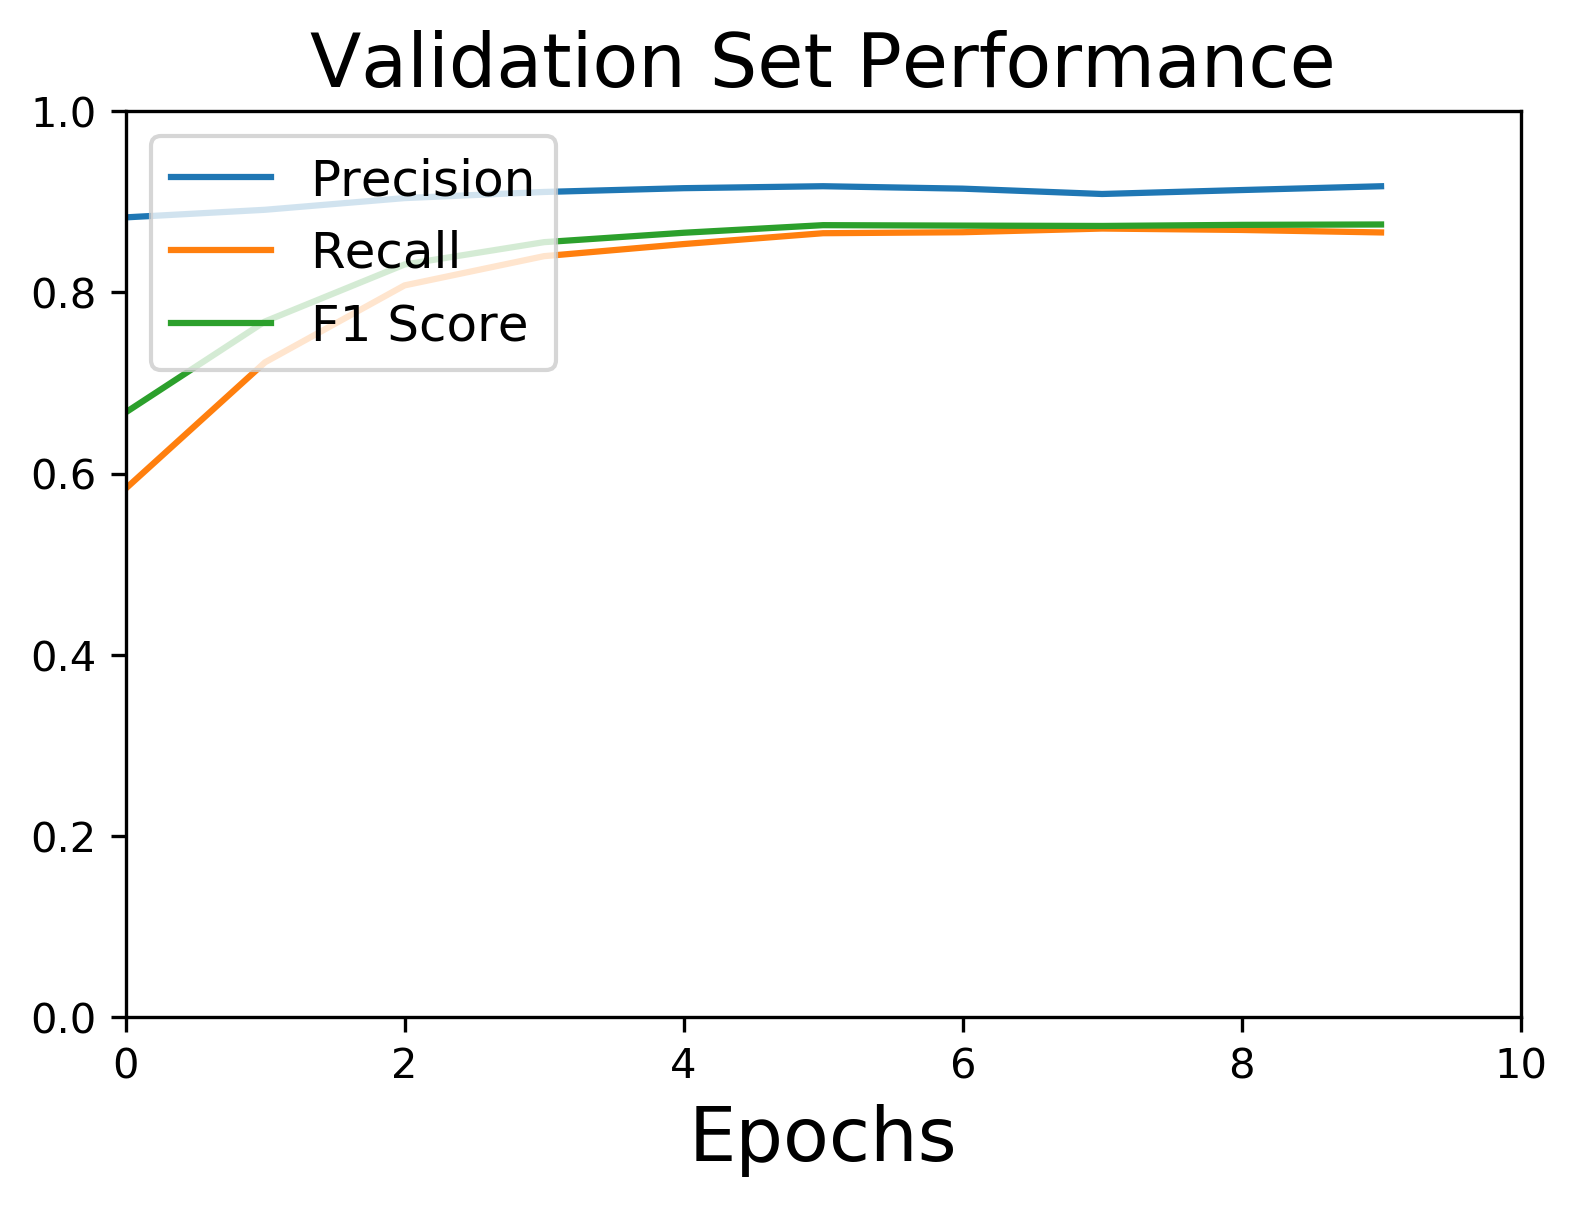

In [27]:
nEpochs = preds.shape[0]
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, precOverEpoch)
plt.plot(x, recOverEpoch)
plt.plot(x, f1OverEpoch)
plt.axis([0, nEpochs, 0, 1.0])

plt.legend(['Precision', 'Recall', 'F1 Score'], loc='upper left', fontsize = 12)
plt.title('Validation Set Performance', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
fig.savefig(os.path.join(resultPath, 'precRecF1.png'))


In [28]:
f1OverEpoch

array([ 0.66741183,  0.76791432,  0.83077165,  0.85540883,  0.86577963,
        0.87418138,  0.87368945,  0.87330827,  0.87451377,  0.87493796])

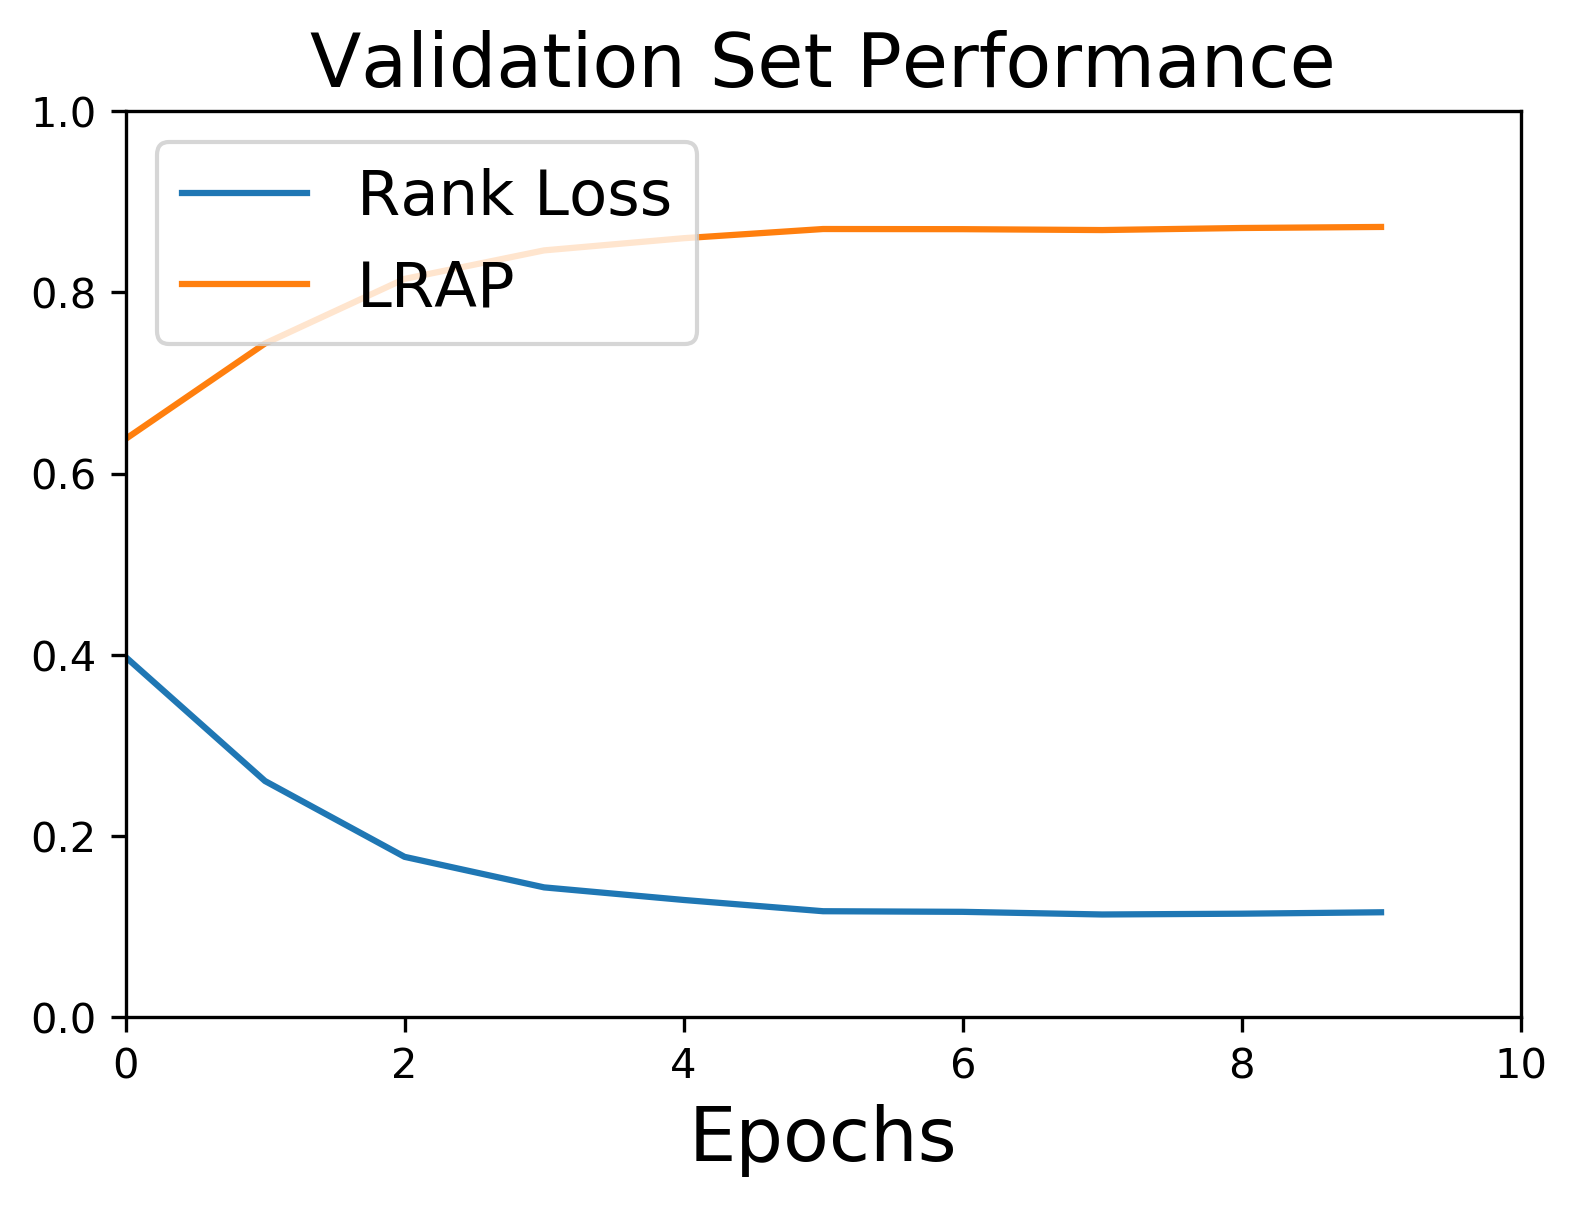

In [29]:
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, rankLossOverEpoch)
plt.plot(x, lrapOverEpoch)
plt.axis([0, nEpochs, 0, 1.0])

plt.legend(['Rank Loss', 'LRAP'], loc='upper left', fontsize = 15)
plt.title('Validation Set Performance', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)

fig.savefig(os.path.join(resultPath, 'rankLoss.png'))

The mean number of codes in the devSet is 2.821


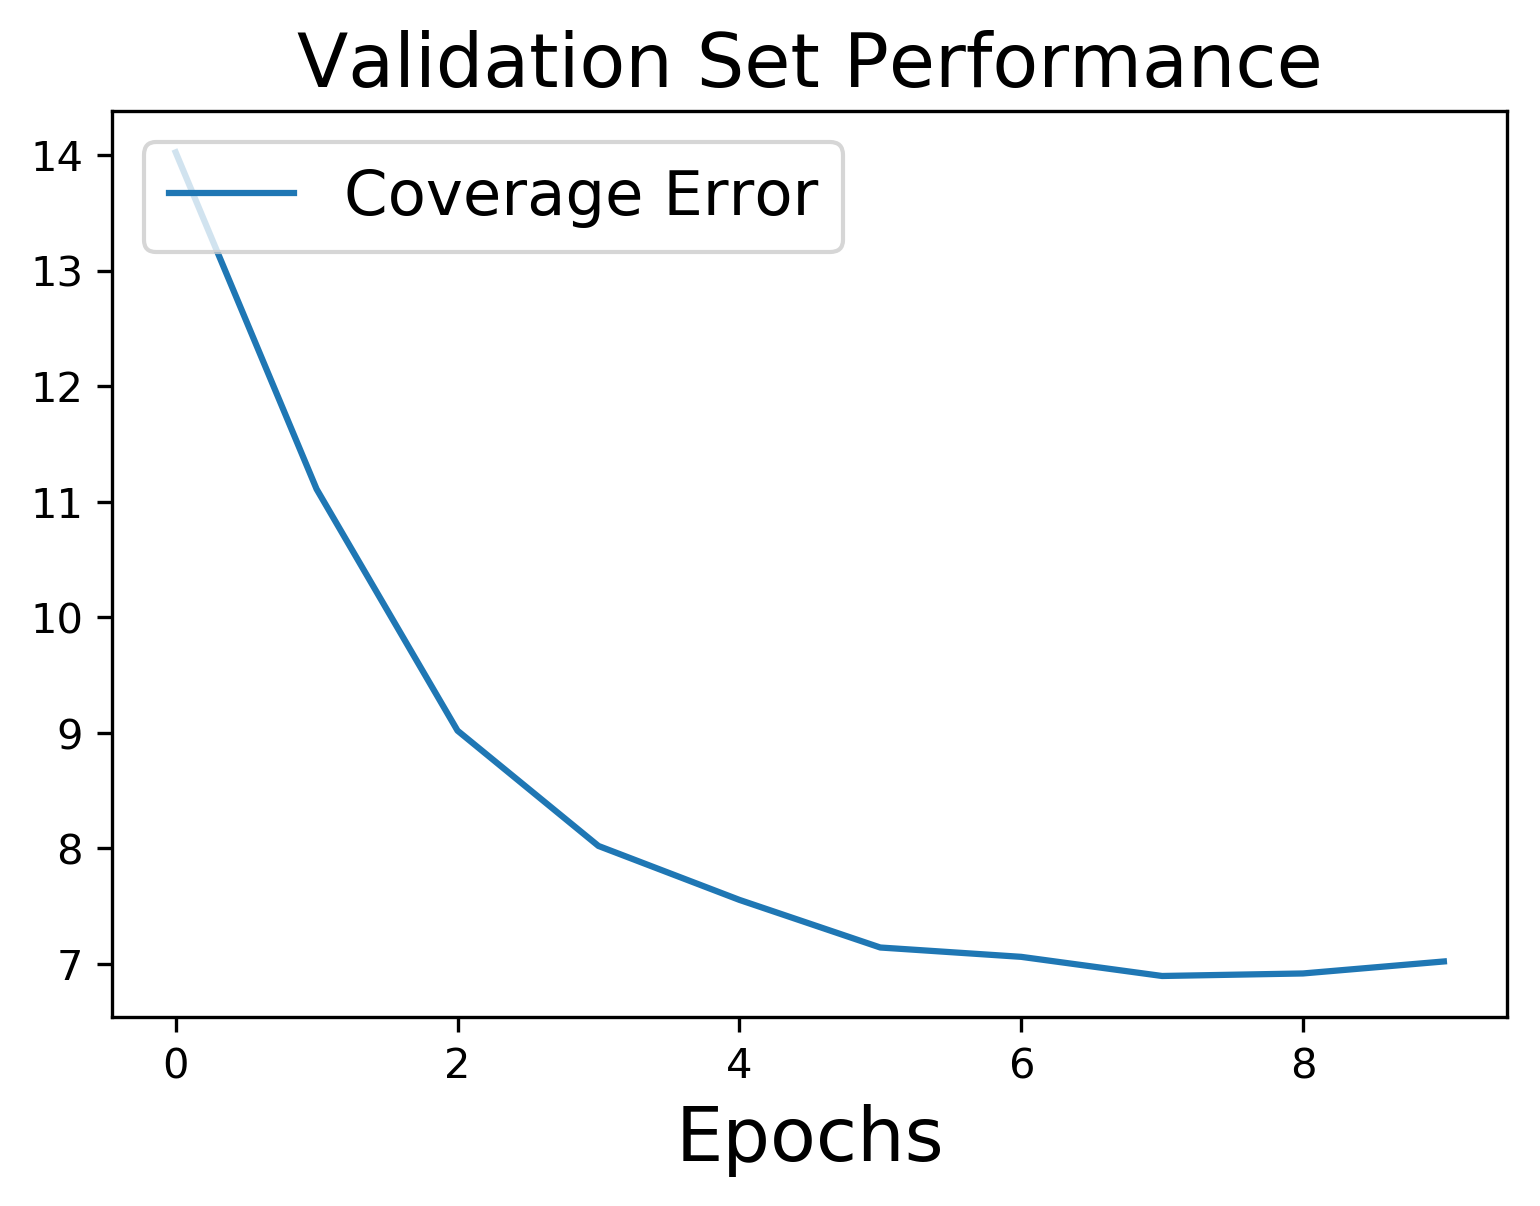

In [30]:
meanNumberOfCodes = np.sum(yDev, axis = 1)
meanNumberOfCodes = np.mean(meanNumberOfCodes)
print('The mean number of codes in the devSet is %.3f'%meanNumberOfCodes)
fig = plt.figure(dpi = 300)
x = range(preds.shape[0])
plt.plot(x, coverErrOverEpoch)

plt.legend(['Coverage Error'], loc='upper left', fontsize = 15)
plt.title('Validation Set Performance', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
# plt.show()
fig.savefig(os.path.join(resultPath, 'coverage.png'))

## Confusion Matrices
Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.


As of right now this code isn't real

In [31]:
with open(os.path.join(resultPath, 'features.pkl'), 'rb') as handle:
    icdDict = pickle.load(handle)[2]
    
pp.pprint(icdDict)

{   '': 0,
    '1': 10,
    '10': 1,
    '11': 8,
    '12': 3,
    '13': 2,
    '14': 5,
    '15': 4,
    '16': 7,
    '17': 6,
    '18': 9,
    '2': 12,
    '3': 11,
    '4': 14,
    '5': 13,
    '6': 16,
    '7': 15,
    '8': 18,
    '9': 17}


In [20]:
myMapper = {'cat:1': 'ICD_001_139',
                 'cat:10': 'ICD_520_579',
                 'cat:11': 'ICD_580_629',
                 'cat:12': 'ICD_630_679',
                 'cat:13': 'ICD_680_709',
                 'cat:14': 'ICD_710_739',
                 'cat:15': 'ICD_740_759',
                 'cat:16': 'ICD_760_779',
                 'cat:17': 'ICD_780_799',
                 'cat:18': 'ICD_800_999',
                 'cat:19': 'ICD_EV',
                 'cat:2': 'ICD_140_239',
                 'cat:3': 'ICD_240_279',
                 'cat:4': 'ICD_280_289',
                 'cat:5': 'ICD_290_319',
                 'cat:6': 'ICD_320_359',
                 'cat:7': 'ICD_360_389',
                 'cat:8': 'ICD_390_459',
                 'cat:9': 'ICD_460_519'}

In [53]:
mySnomedMapper = {1: 'Infectious_parasitic',
                 10: 'Digestive',
                 11: 'Genitourinary',
                 12: 'Pregnancy',
                 13: 'Skin_Subcutaneous',
                 14: 'Musculoskeletal',
                 15: 'Congenital',
                 16: 'Perinatal',
                 17: 'Clinical_signs',
                 18: 'Injury_poisoning',
                 19: 'ICD_EV',
                 2: 'Neoplasia',
                 3: 'Endo_Nut_Met_Immune',
                 4: 'Hematopoietic',
                 5: 'Mental',
                 6: 'Nervous',
                 7: 'Sense_organs',
                 8: 'Circulatory',
                 9: 'Respiratory'}

In [21]:
#for diseases:

mySnomedMapper = {1: 'Lymphoma',
                 10: 'Exploration of peritoneal cavity',
                 11: 'Chronic kidney disease',
                 2: 'Malignant mast cell neoplasm',
                 3: 'Physical rehabilitation therapy',
                 4: 'Malignant neoplasm of skin',
                 5: 'US scan of heart',
                 6: 'Atopic dermatitis',
                 7: 'Malignant mesenchymal tumour',
                 8: 'Osteosarcoma',
                 9: 'Secondary lymph node cancer'}

In [22]:
sorted(icdDict.keys())

['', '1', '10', '11', '2', '3', '4', '6', '9']

In [52]:
#prediction of best epoch
#can give binary or percentage for each category
#predsBest - numpy array - for development set (yDev)
predsBest = preds[bestEpoch,:,:]
#yDev = numpy array
yTruth = yDev
classTrainingExamples = np.sum(yTrain, axis = 0)

diseaseSpecificScores_F1 = np.zeros(classTrainingExamples.shape)
diseaseSpecificScores_Prec = np.zeros(classTrainingExamples.shape)
diseaseSpecificScores_Rec = np.zeros(classTrainingExamples.shape)
for colIdx in range(yTruth.shape[1]):
    currTruth = yTruth[:, colIdx]
    currPred = predsBest[:, colIdx]
    confMat = metrics.confusion_matrix(y_true = currTruth, y_pred = currPred)
#     print(confMat)
    prec = metrics.precision_score(y_pred = currPred, y_true= currTruth, average = 'binary')
    rec = metrics.recall_score(y_pred = currPred, y_true= currTruth, average = 'binary')
    f1 = metrics.f1_score(y_pred = currPred, y_true= currTruth, average = 'binary')
    diseaseSpecificScores_F1[colIdx] = f1
    diseaseSpecificScores_Prec[colIdx] = prec
    diseaseSpecificScores_Rec[colIdx] = rec
    print('total positives {} or {} of the total'.format(np.sum(currPred), np.mean(currPred)))
    print('For Column {}'.format(colIdx))
#     print('precision {}'.format(prec))
#     print('recall {}'.format(rec))
    print('f1 score {}'.format(f1))
    print('Number of training examples {}'.format(classTrainingExamples[colIdx]))
    print('Percent of training examples {}'.format(classTrainingExamples[colIdx]/yTrain.shape[0]))
    print('***************************')
#     1/0

total positives 0.0 or 0.0 of the total
For Column 0
f1 score 0.0
Number of training examples 0.0
Percent of training examples 0.0
***************************
total positives 6079.0 or 0.180166562935 of the total
For Column 1
f1 score 0.83338490099
Number of training examples 15927.0
Percent of training examples 0.202078258222
***************************
total positives 5187.0 or 0.153729883524 of the total
For Column 2
f1 score 0.817731421121
Number of training examples 14829.0
Percent of training examples 0.188147076736
***************************


/Users/ashley1/software/anaconda/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/ashley1/software/anaconda/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


total positives 0.0 or 0.0 of the total
For Column 3
f1 score 0.0
Number of training examples 103.0
Percent of training examples 0.00130684125051
***************************
total positives 335.0 or 0.00992857354554 of the total
For Column 4
f1 score 0.425981873112
Number of training examples 2358.0
Percent of training examples 0.0299177831912
***************************
total positives 5966.0 or 0.176817521709 of the total
For Column 5
f1 score 0.810335434664
Number of training examples 16038.0
Percent of training examples 0.203486601705
***************************
total positives 33115.0 or 0.98144690436 of the total
For Column 6
f1 score 0.989721043056
Number of training examples 76771.0
Percent of training examples 0.974053491677
***************************
total positives 0.0 or 0.0 of the total
For Column 7
f1 score 0.0
Number of training examples 41.0
Percent of training examples 0.000520198944377
***************************
total positives 2103.0 or 0.0623277318396 of the total

In [54]:
xAxisLabels = ['']*len(icdDict.keys())
xAxisOriginalOrder = ['']*len(icdDict.keys())
for icdKey, idx in icdDict.items(): 
    if icdKey == '':
        next
    else:
        xAxisLabels[idx] = mySnomedMapper[int(icdKey)]
        xAxisOriginalOrder[idx] = idx
        
sortedAxisLabels = np.argsort(xAxisLabels)
[xAxisLabels[sortedIdx] for sortedIdx in sortedAxisLabels]

['',
 'Circulatory',
 'Clinical_signs',
 'Congenital',
 'Digestive',
 'Endo_Nut_Met_Immune',
 'Genitourinary',
 'Hematopoietic',
 'Infectious_parasitic',
 'Injury_poisoning',
 'Mental',
 'Musculoskeletal',
 'Neoplasia',
 'Nervous',
 'Perinatal',
 'Pregnancy',
 'Respiratory',
 'Sense_organs',
 'Skin_Subcutaneous']

In [55]:
classTrainingExamples

array([  0.00000000e+00,   1.59270000e+04,   1.48290000e+04,
         1.03000000e+02,   2.35800000e+03,   1.60380000e+04,
         7.67710000e+04,   4.10000000e+01,   6.21800000e+03,
         6.89900000e+03,   8.02700000e+03,   1.21900000e+04,
         2.51160000e+04,   3.78000000e+02,   7.05700000e+03,
         1.05250000e+04,   5.25100000e+03,   7.91300000e+03,
         6.11500000e+03])

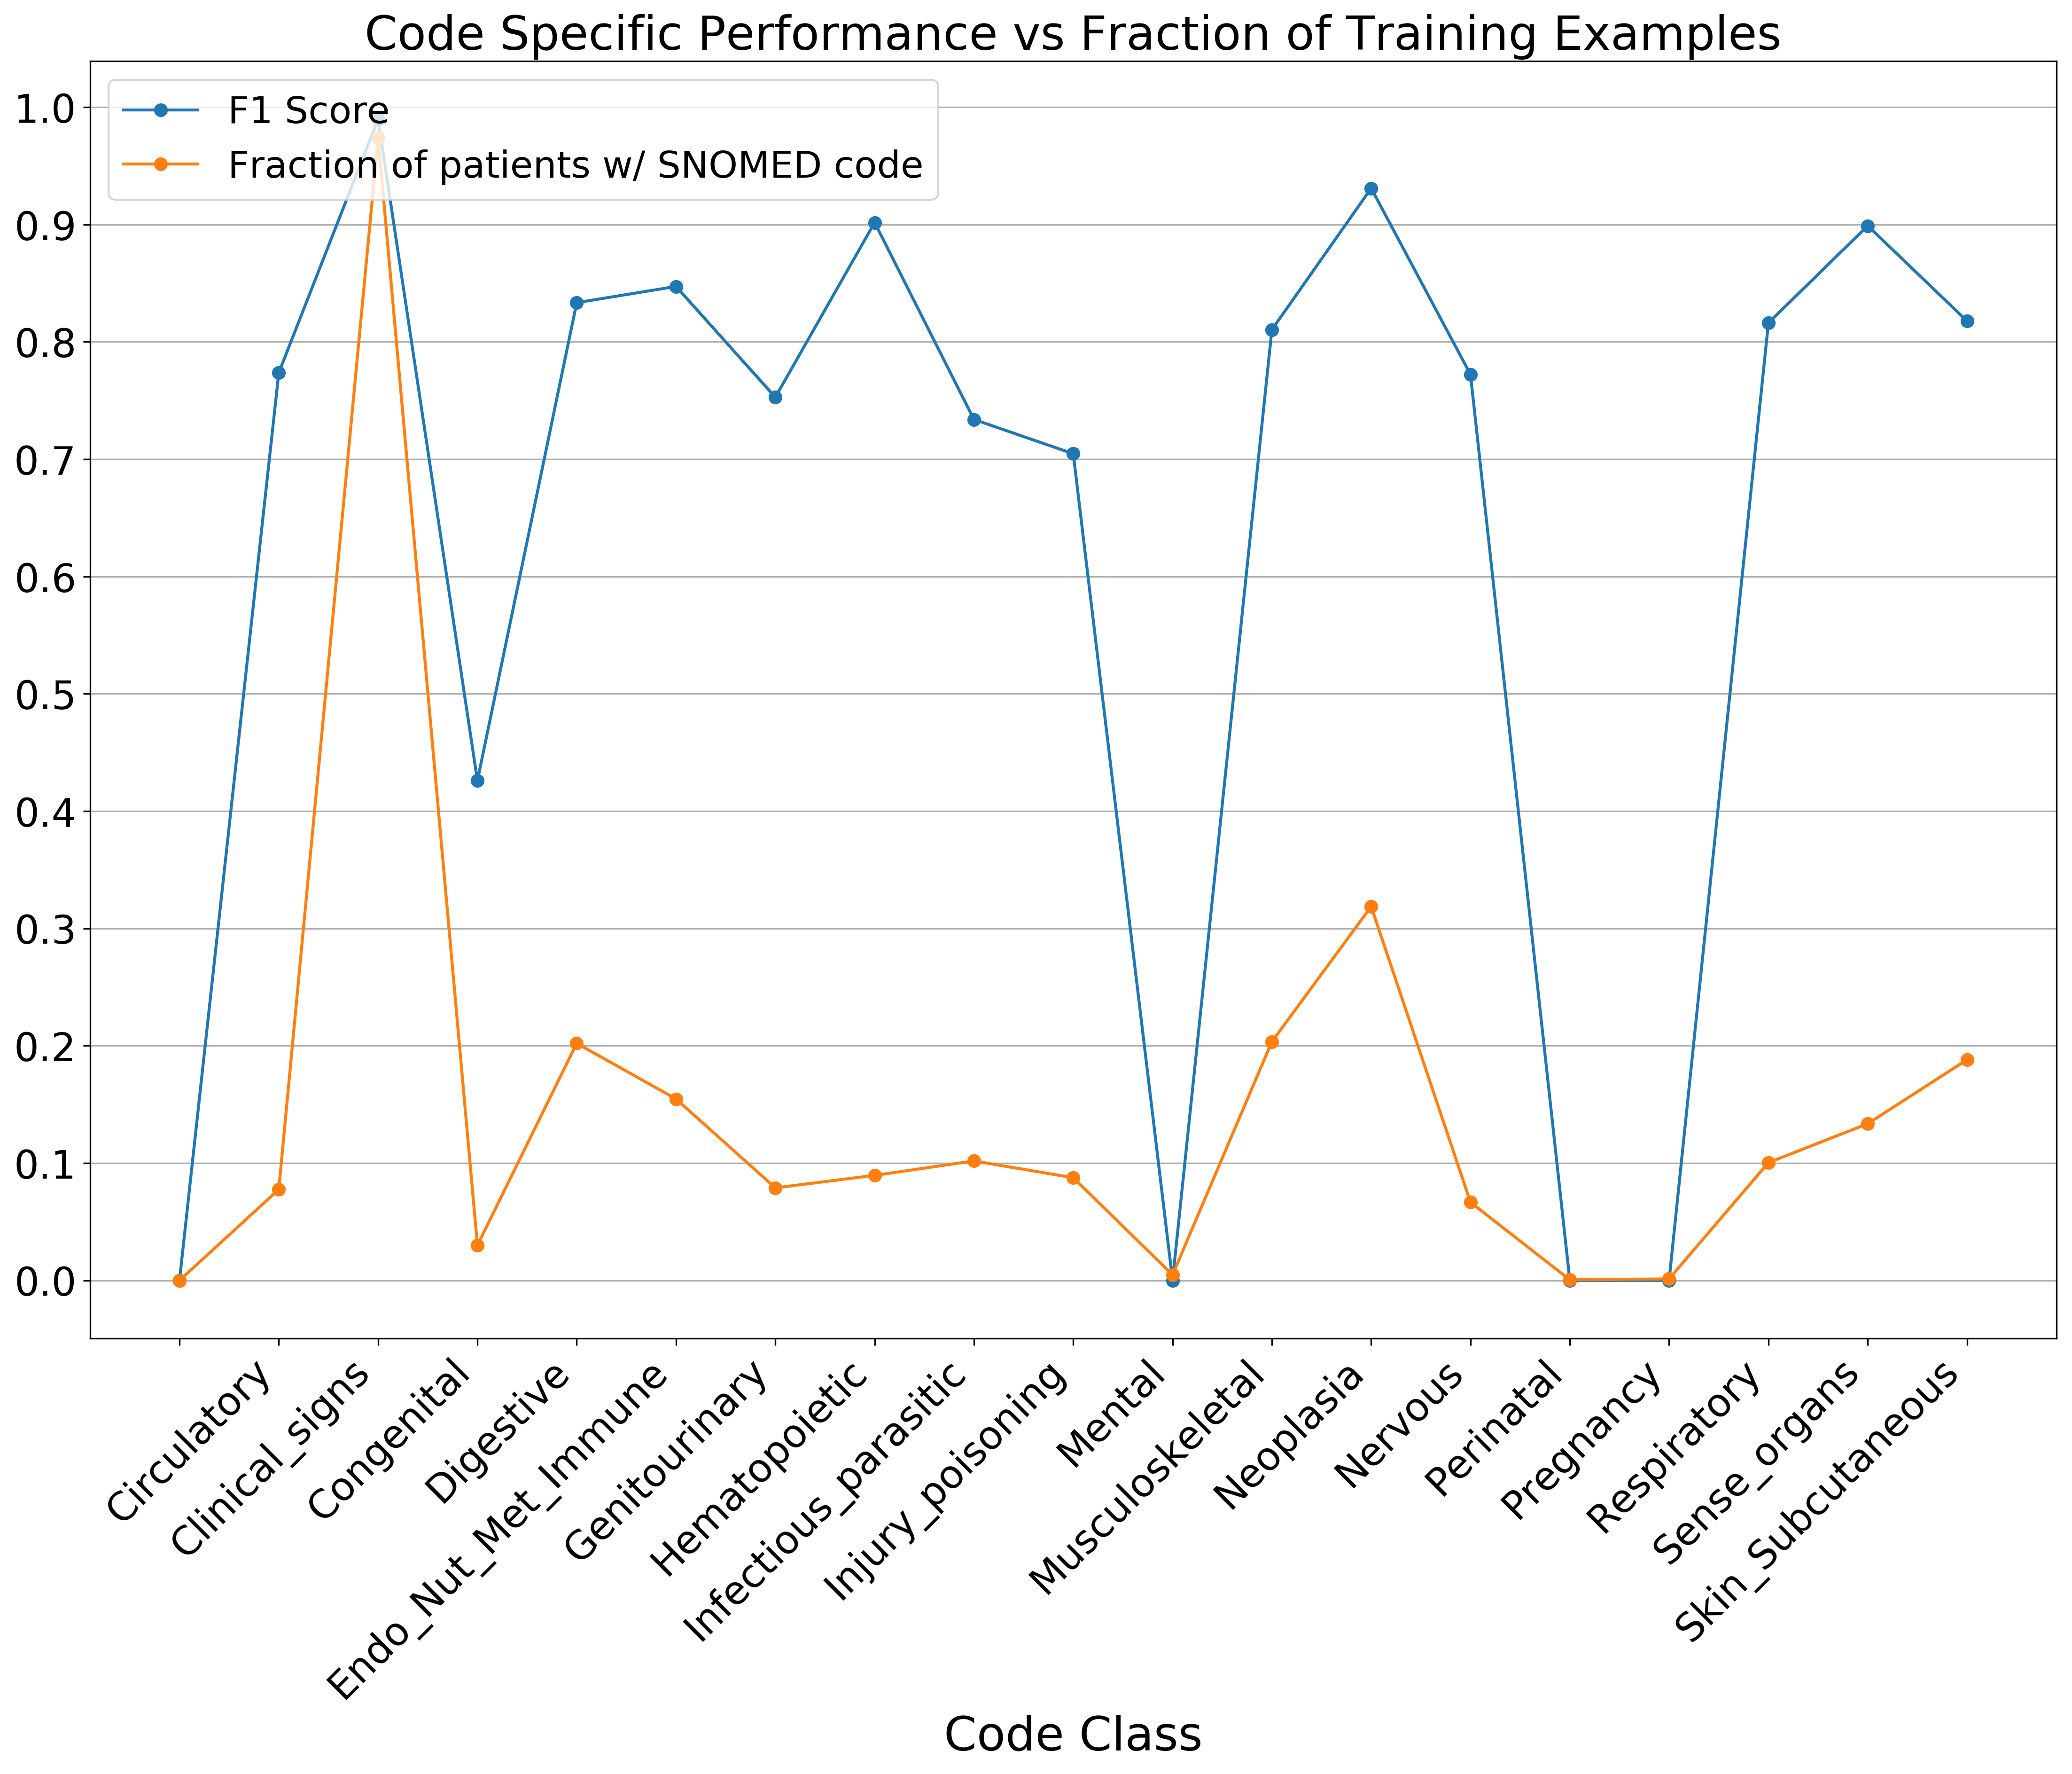

In [56]:
predsBest = preds[bestEpoch,:,:]
yTruth = yDev
classTrainingExamples = np.sum(yTrain, axis = 0)

diseaseSpecificScores_F1 = np.zeros(classTrainingExamples.shape)
diseaseSpecificScores_Prec = np.zeros(classTrainingExamples.shape)
diseaseSpecificScores_Rec = np.zeros(classTrainingExamples.shape)
for colIdx in range(yTruth.shape[1]):
    currTruth = yTruth[:, colIdx]
    currPred = predsBest[:, colIdx]
    confMat = metrics.confusion_matrix(y_true = currTruth, y_pred = currPred)

    prec = metrics.precision_score(y_pred = currPred, y_true= currTruth, average = 'binary')
    rec = metrics.recall_score(y_pred = currPred, y_true= currTruth, average = 'binary')
    f1 = metrics.f1_score(y_pred = currPred, y_true= currTruth, average = 'binary')
    diseaseSpecificScores_F1[colIdx] = f1
    diseaseSpecificScores_Prec[colIdx] = prec
    diseaseSpecificScores_Rec[colIdx] = rec


nClasses = yTrain.shape[1]

width = 18
height = 12
fig = plt.figure(dpi = 300, figsize=(width, height))
x = range(1, nClasses + 1)
diseaseSpecificScores_F1 = [diseaseSpecificScores_F1[sortedIdx] for sortedIdx in sortedAxisLabels]
plt.plot(x, diseaseSpecificScores_F1, linestyle='-', marker='o')
factionOfObsPerDisease = classTrainingExamples/yTrain.shape[0]
factionOfObsPerDisease = [factionOfObsPerDisease[sortedIdx] for sortedIdx in sortedAxisLabels]
my_xticks = xAxisLabels
my_xticks = [my_xticks[sortedIdx] for sortedIdx in sortedAxisLabels]
plt.plot(x, factionOfObsPerDisease, linestyle='-', marker='o')

plt.xticks(np.arange(1, nClasses + 1, 1.0), my_xticks, rotation=45, ha = 'right')

plt.yticks(np.arange(0, 1.1, 0.1))


plt.legend(['F1 Score', 'Fraction of patients w/ SNOMED code'], loc='upper left', fontsize = 19)

plt.title('Code Specific Performance vs Fraction of Training Examples', fontsize = 24)
plt.xlabel('Code Class', fontsize = 24)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.gca().yaxis.grid(True)

plt.show()
fig.savefig(os.path.join(resultPath, 'diseaseSpecific.png'))


In [57]:
np.corrcoef(diseaseSpecificScores_F1, classTrainingExamples)

array([[ 1.        ,  0.18014042],
       [ 0.18014042,  1.        ]])

In [58]:
import scipy
scipy.stats.spearmanr(diseaseSpecificScores_F1, classTrainingExamples)

SpearmanrResult(correlation=0.21850432286074808, pvalue=0.36880869097702229)

In [59]:
scipy.stats.spearmanr(diseaseSpecificScores_F1, factionOfObsPerDisease)

SpearmanrResult(correlation=0.85815810671922832, pvalue=2.608817241283751e-06)

In [60]:
len(factionOfObsPerDisease)

19